# Code

In [170]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import math

## Loading Dataset

- Dataset contains 506 samples and 13 features (matrix of features)

In [171]:
boston = load_boston()

/home/maruf/.cache/pypoetry/virtualenvs/anaconda-pOKeClin-py3.10/lib64/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternati

In [172]:
boston.data.shape

(506, 13)

- Prints the characteristic/properties of the data

In [173]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Splitting Dataset into Training Set & Test Set

- `X_train` - Matrix of Features of the training set
- `X_test` - Matrix of Features of the testing set
- `y_train` - Dependent Variable Vector of the training set
- `y_test` - Dependent Variable Vector of the testing set

- `train_test_set(matrix_of_features, dependent_variable_vector, test_size=), random_state=)` returns a tuple with the split dataset
  - The Matrix of Features (labels) and Dependent Variable Vector must be separated
  - `test_size` - size of the test set given in decimal, the default is 0.25 test (leaving 0.75 for training set)
  - `random_state` - a seed given so that the random split is consistent across multiple runs
  - The dataset is split into:
    - `X_train`, `X_test`, `y_train`, `y_test`
    - `train_test_split` returns a list which is then unpacked into the 4 variables
    - The spit is done at random (pseudo-random) as there could potentially be an order in the labels (matrix of features) 

In [174]:
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state=0)

## K-Nearest Neighbour Regressor

- For each `K` in a range from `1` to `K_max` create a K Nearest Neighbours regressor, evaluate the accuracy of each of these regressors

In [175]:
k_max: int = 50 # max number of neighbors to consider
results: np.ndarray = np.empty(k_max) # array to store results

for k in range(k_max): # loop over all possible neighbors
	knn = KNeighborsRegressor(n_neighbors=k+1) # create a KNN regressor with k neighbors 
	knn.fit(X_train, y_train) # fit the model to the training data and training targets 
	results[k] = knn.score(X_test, y_test) # evaluate the model on the test data and store the result

## Plotting

- Plotting the accuracy of the model against `K`

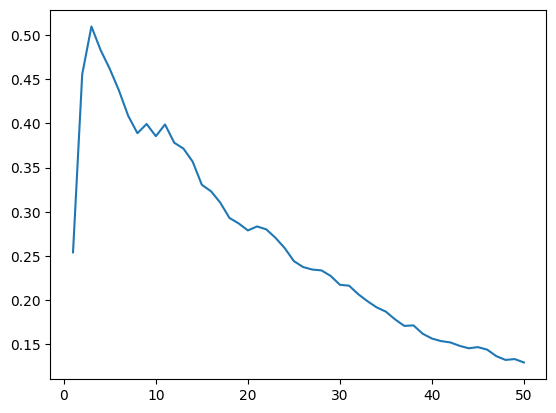

In [176]:
plt.plot(np.arange(k_max) + 1, results)

## Cross-Validation
- Cross-validation is used to get a nicer U-shaped curve

In [177]:
from sklearn.model_selection import cross_val_score

- There is a pitfall to `scikit-learn`'s implementation of cross-validation
- The dataset on which cross-validation is performed is split into folds in a systematic manner rather than randomly
- This can lead to counterintuitive results unless the data is shuffled randomly
- The `train_test_split` already does this shuffling hence reshuffling is not required

In [178]:
knn: KNeighborsRegressor = KNeighborsRegressor(n_neighbors=1) # create a KNN regressor with 1 neighbors
cross_val_score(knn, X_train, y_train) # evaluate the model on the training data using 5-fold cross-validation

array([0.41743153, 0.17741167, 0.01938625, 0.427455  , 0.25685911])

### Shuffling Data

- The `shuffle` function can shuffle several arrays of the same length
- Each of those arrays are shuffled in the same way

In [179]:
from sklearn.utils import shuffle

In [180]:
X, y = shuffle(boston['data'], boston['target'], random_state=0) # shuffle the data and targets 

In [181]:
print(cross_val_score(knn, X, y)) # evaluate the model on the shuffled data using 5-fold cross-validation

[0.27367598 0.27668466 0.48155521 0.45730902 0.67114389]


- The best (largest) possible value for `R^2` is `1` which means that the performance of Nearest Neighbour is not optimal 

In [182]:
knn.fit(X_train, y_train) # fit the model to the training data and training targets
print("Score: ", knn.score(X_test, y_test)) # evaluate the model on the test data

Score:  0.2540875231617269


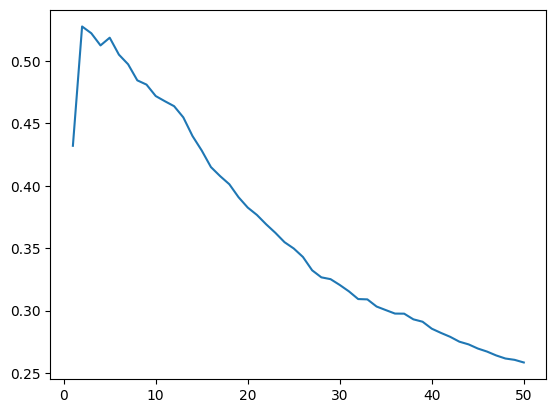

In [183]:
K_max: int = 50 # max number of neighbors to consider
for k in range(K_max):
	knn: KNeighborsRegressor = KNeighborsRegressor(n_neighbors=k+1) # create a KNN regressor with k neighbors
	results[k] = np.mean(cross_val_score(knn, X, y)) # evaluate the model on the shuffled data using 5-fold cross-validation and work out the mean score
plt.plot(np.arange(K_max)+1, results) # plot the results 

## Learning Curves

- **Learning Curve:** the prediction accuracy of an large test set of the model trained on a training set of size $n$ as a function of $n$

In [184]:
knn = KNeighborsRegressor(n_neighbors=3)
train_sizes: np.ndarray[int] = np.array([50, 100, 200, 300])

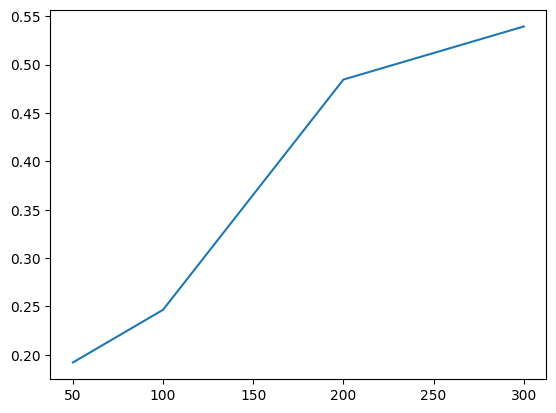

In [185]:
results: list = np.empty(len(train_sizes))
for k in range(train_sizes.size):
	X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], train_size=train_sizes[k], random_state=0)
	knn.fit(X_train, y_train)
	results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes, results)

## Value at Risk
- Useful information for implementing a conformal predictor 
- Regression instead of classification

- Suppose we work for a bank and our task is each morning to estimate our bank’s Value at Risk (VaR). 
- The bank’s preferred confidence level is $80%$, which means that the probability that the bank’s loss on a given day exceeds the VaR that you produce in the morning of that day should be $20%$ or less
- In the morning of day $n + 1$ you are only given the losses $L_1, . . . , L_n$ for the previous n days

**Remark 1**
- Computing VaR is an important area in practical finance, but in real life banks have lots of other information in addition to $L_1, . . . , L_n$
- This other information is so important that the primitive conformal predictor described in this section is useless in practice (unless it is extended to take account of the extra information)
- To develop a conformal predictor for our problem, consider different possible values for Ln+1. Suppose, for simplicity, that the losses in the sequence $L_1, . . . , L_n, L_n+_1$ are all different.

- As the nonconformity scores we will take the losses themselves: $α_i = L_i$ for all $i$
- Rank all losses (= nonconformity scores) according to their value: the largest loss among $L_1, . . . , L_n+_1$ gets rank 1, the second largest gets rank 2, etc
- Notice that the p-value is the rank of $Ln+1$ divided by $n + 1$
- Deduce that the prediction set $Γ20%$ = Γ1/5 is the semi-infinite interval (−∞, L], where L is the smallest element of {L1, . . . , Ln} whose rank in this set is (n+ 1)/5 or less. (If this appears too difficult in general, do this in the special case where n = 99.)


In [186]:
n: int = 99
L: np.ndarray[float] = 10 ** 6 * np.random.random((n)) - 10 ** 6/2
print(L)

[ 389836.97467348   16907.03701131 -123295.18361996 -114890.31542873
   38061.23447125  393488.60456964    4224.3708842    24651.49174118
 -393195.38241519  -79204.98613344  357207.72132632  145142.2795791
 -454189.97158222 -364794.0236101   445102.76564513  -54907.544788
 -444548.42562277 -309681.17784842 -321686.43813663  487020.98926945
 -435283.2564117   -62628.53680589 -215103.13983466 -131612.73862936
   69593.45395709 -433170.39382929 -446025.2028554    13392.05480472
  407884.36597553  -70347.57400326 -391168.60534654   72327.76454339
  252121.12947264  144931.18866017 -145979.17616689  449410.64158469
  477365.50833733  473852.60999874 -418621.99996495  286005.6150206
   86322.8159896    74614.77364118  -25769.9646197   107059.99015628
  445603.09297557  330345.3275398   498722.23660152 -314648.17742592
 -142595.96364414  115193.19487811   50920.18683915 -363704.21086492
 -258861.87486931  495221.66029666 -158228.9235303  -492553.70348871
 -211443.61474531  217860.16903417  37

In [187]:
sorted_L: np.ndarray[float] = np.sort(L)
VaR: float = sorted_L[-int(np.floor((n + 1) / 5))] 
print(VaR)

376269.11915512814


In [188]:
def VaR(L: list[float]) -> float:
	if L.size >= 4:
		return (np.sort(L)[-int(np.floor((n + 1) / 5))]) 
	else:
		return math.inf

In [189]:
print(VaR(L))

376269.11915512814


## Validity of Conformal Prediction - An Empirical Test

In [190]:
N: int = 500
L: np.ndarray[float] = 100 ** 6 * np.random.random_sample((N)) - 10 ** 6/2

In [191]:
successes: np.ndarray = np.empty(N)
for n in range(N):
	V: float = VaR(L[:n])
	if L[n] <= V:
		successes[n] = 1 # successfully work out the VaR
	else:
		successes[n] = 0 # failed to work out the VaR

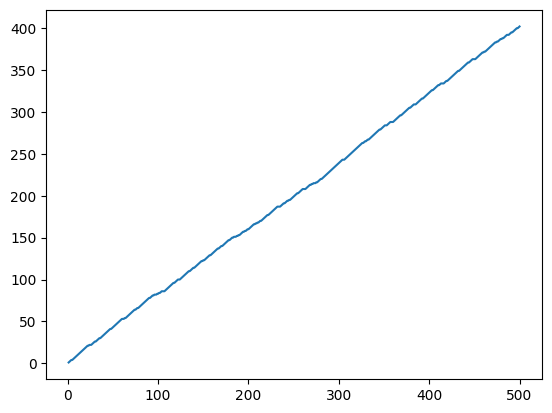

In [192]:
plt.plot(np.arange(N) + 1, np.cumsum(successes))

# Exercises

## Question 1
Explain the role of the np.mean function.

- The `cross_val_score()` returns an array of floats
- `np.mean()` computes the mean of using the values stored in the array

## Question 2
Try different values of K_max in `In[3]` and `In[8]`. What is the optimal value of the number K of nearest neighbours? Compare the behaviour of the two inverted U-shaped curves for large values of K. 

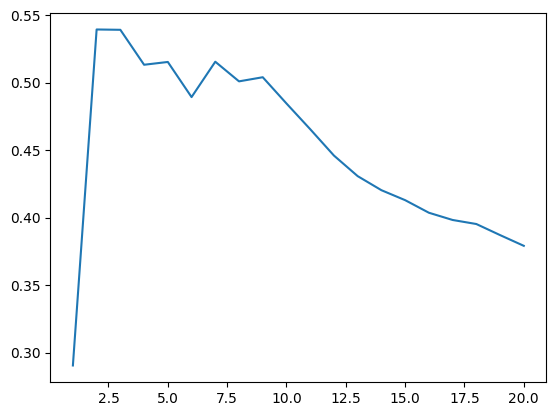

In [193]:
k_max: int = 20 # max number of neighbors to consider
results: np.ndarray = np.empty(k_max) # array to store results

for k in range(k_max): # loop over all possible neighbors
	knn = KNeighborsRegressor(n_neighbors=k+1) # create a KNN regressor with k neighbors 
	knn.fit(X_train, y_train) # fit the model to the training data and training targets 
	results[k] = knn.score(X_test, y_test) # evaluate the model on the test data and store the result
plt.plot(np.arange(k_max) + 1, results)

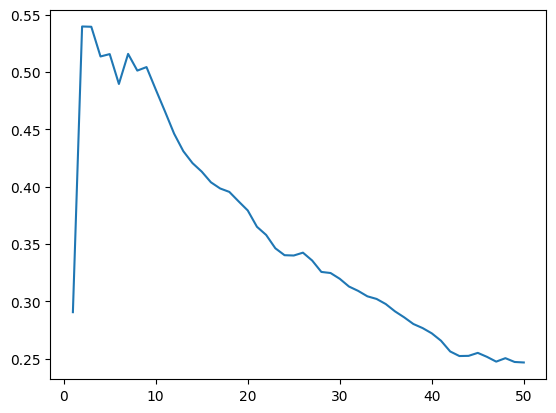

In [194]:
k_max: int = 50 # max number of neighbors to consider
results: np.ndarray = np.empty(k_max) # array to store results

for k in range(k_max): # loop over all possible neighbors
	knn = KNeighborsRegressor(n_neighbors=k+1) # create a KNN regressor with k neighbors 
	knn.fit(X_train, y_train) # fit the model to the training data and training targets 
	results[k] = knn.score(X_test, y_test) # evaluate the model on the test data and store the result
plt.plot(np.arange(k_max) + 1, results)

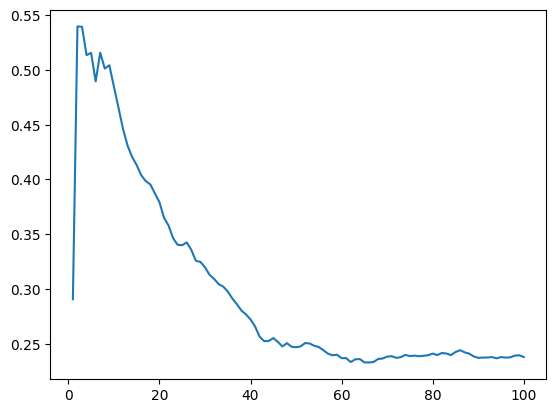

In [195]:
k_max: int = 100 # max number of neighbors to consider
results: np.ndarray = np.empty(k_max) # array to store results

for k in range(k_max): # loop over all possible neighbors
	knn = KNeighborsRegressor(n_neighbors=k+1) # create a KNN regressor with k neighbors 
	knn.fit(X_train, y_train) # fit the model to the training data and training targets 
	results[k] = knn.score(X_test, y_test) # evaluate the model on the test data and store the result
plt.plot(np.arange(k_max) + 1, results)

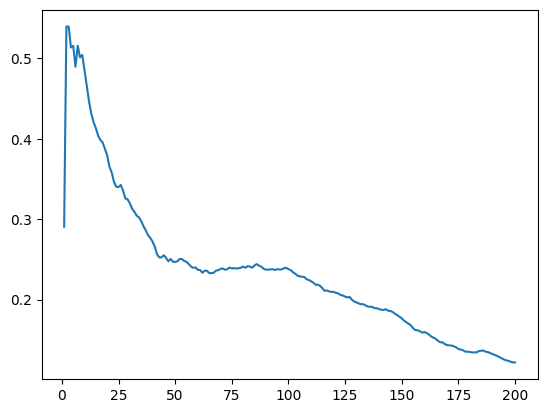

In [196]:
k_max: int = 200 # max number of neighbors to consider
results: np.ndarray = np.empty(k_max) # array to store results

for k in range(k_max): # loop over all possible neighbors
	knn = KNeighborsRegressor(n_neighbors=k+1) # create a KNN regressor with k neighbors 
	knn.fit(X_train, y_train) # fit the model to the training data and training targets 
	results[k] = knn.score(X_test, y_test) # evaluate the model on the test data and store the result
plt.plot(np.arange(k_max) + 1, results)

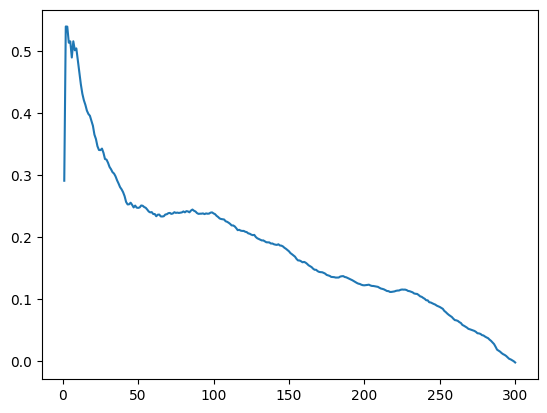

In [197]:
k_max: int = 300 # max number of neighbors to consider
results: np.ndarray = np.empty(k_max) # array to store results

for k in range(k_max): # loop over all possible neighbors
	knn = KNeighborsRegressor(n_neighbors=k+1) # create a KNN regressor with k neighbors 
	knn.fit(X_train, y_train) # fit the model to the training data and training targets 
	results[k] = knn.score(X_test, y_test) # evaluate the model on the test data and store the result
plt.plot(np.arange(k_max) + 1, results)

## Question 3
Try other arrays of train_sizes in `In[9]`. Write one sentence summarizing what you see.

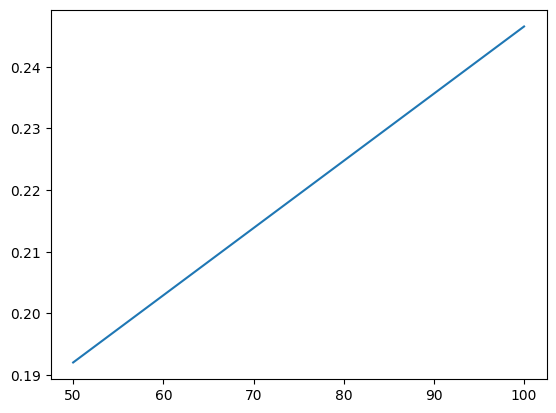

In [198]:
knn = KNeighborsRegressor(n_neighbors=3)
train_sizes: np.ndarray[int] = np.array([50, 100])

results: list = np.empty(len(train_sizes))
for k in range(train_sizes.size):
	X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], train_size=train_sizes[k], random_state=0)
	knn.fit(X_train, y_train)
	results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes, results)

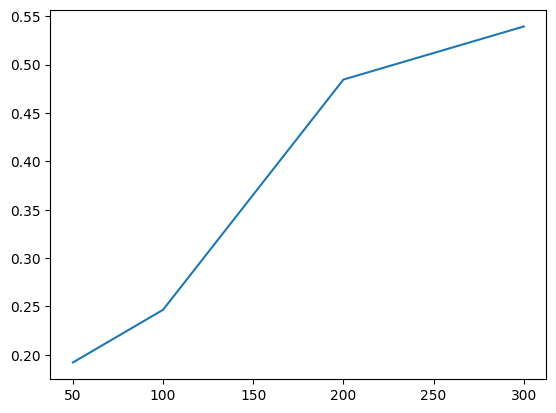

In [199]:
knn = KNeighborsRegressor(n_neighbors=3)
train_sizes: np.ndarray[int] = np.array([50, 100, 200, 300])

results: list = np.empty(len(train_sizes))
for k in range(train_sizes.size):
	X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], train_size=train_sizes[k], random_state=0)
	knn.fit(X_train, y_train)
	results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes, results)

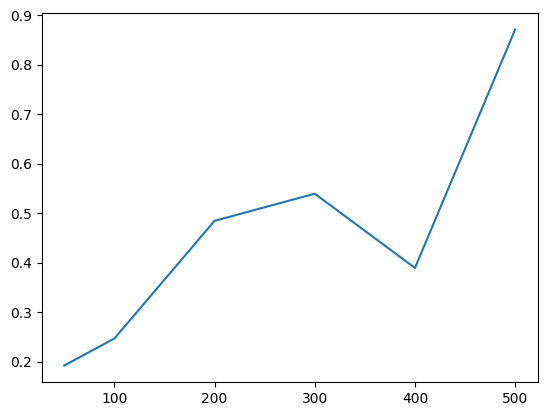

In [200]:
knn = KNeighborsRegressor(n_neighbors=3)
train_sizes: np.ndarray[int] = np.array([50, 100, 200, 300, 400, 500])

results: list = np.empty(len(train_sizes))
for k in range(train_sizes.size):
	X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], train_size=train_sizes[k], random_state=0)
	knn.fit(X_train, y_train)
	results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes, results)

## Question 6
Plot a learning curve for the iris dataset.

In [201]:
# import iris dataset
from sklearn.datasets import load_iris
iris = load_iris()


In [202]:
# split iris data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)


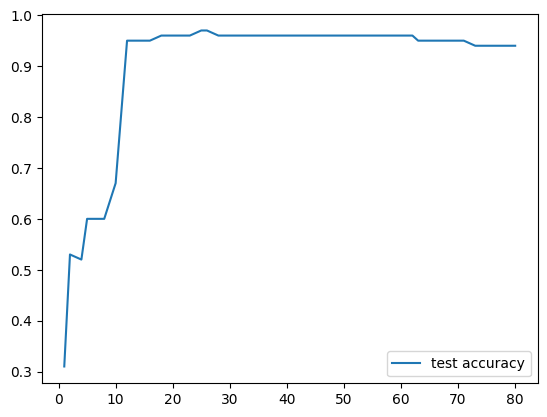

In [210]:
# plot learning curve for iris dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='test accuracy')
plt.legend()

# Revision Questions

## Question 1
What is meant by overfitting in machine learning?

- **Overfitting** - analysis corresponds to closely to the dataset making it too accurate only for that specific data
  - Leads to future data not being fit reliably 
  - It is too good for the training data to the point where it cannot work reliably for other data
- Could be:
  - Dataset is too small 
  - Model is too complex for the dataset provided
- Overfitting also models useless data

**NOTE:** if the training accuracy is too high, then it is possible that the generalization accuracy decreases

## Question 2
What is meant by underfitting in machine learning?

- **Underfitting** - analysis cannot create model that reliably captures the relationships/trends between the data
- Could be:
  - Dataset is too large for the model
  - Model is not complex enough

## Question 3
Define the training accuracy in machine learning.

- **Training Accuracy** - percentage of correct predictions that the model makes on the training data

## Question 4
Define generalization accuracy in machine learning.

- **Generalization Accuracy** -  percentage of correct predictions that the model makes on new, unseen data

## Question 5
Compare and contrasts the behaviour of the training and generalization accuracy as functions of model complexity. 

- If the training accuracy is too high, then the generalization accuracy would start decreasing 
- Leads to overfitting 

## Question 6
How does the optimal model complexity depend on the size of the dataset?

- As the size of the data increases, the complexity can also be increased
- If the complexity of the data is high but the size of the data is small, then overfitting happens

## Question 7
What is meant by the decision boundary in machine learning?

- **Decision Boundary** - separation between sample of different classes
- If the decision boundary is too close to the training data points, the the model is overfitting hence not generalizing well for new and unseen data
- If the decision boundary is too far from the training data points, then the model is underfitting and is not able to learn from the training data being provided 

## Question 8
Define classifiers, regressors, and estimators in the context of scikit-learn. 

- **Classifier** - models for working with classification problems
- **Regressors** - models for working with regression problems

## Question 9
Give two strengths and two weaknesses of the K Nearest Neighbours algorithm.

**Advantages:**
- Easy to understand model
- Often gives reasonable performance without many adjustments

**Disadvantages:**
- As the training set becomes the larger, the prediction becomes slow
- Data needs to be preprocessed

## Question 10
Define the learning curve of a classifier.

- A learning curve for a classifier will show the relationship between the model's accuracy on the training data and the model's accuracy on the test data

## Question 11
Define the learning curve of a regressor.

- A learning curve for a regressor will show the relationship between the model's performance on the training data and the model's performance on the test data

## Question 12
Describe the method of cross-validation for evaluating generalization performance. Make sure to cover both the case of classification and the case of regression.

- **`K-Fold`**
- Cross validation is a method of evaluating generalization performance
- Data is split randomly into folds of size $K$
- For each number of folds, 1 fold is the test data and the remaining folds are the training data
  - This rotates until every fold has been used for testing 

## Question 13
Explain what the following sequence of commands in `scikit-learn` is doing (assuming that all relevant modules have been imported):
```py
iris = load_iris()
knn = KNeighborsClassifier(n_neighbors=3)
np.mean(cross_val_core(knn, iris.data, iris.target, cv=5))
```
Make sure to explain the role of options such as `cv=5`.

- `iris = load_iris()` loads the iris dataset and stored in the `iris` variable
- `knn = KNeighborsClassifier(n_neighbors=3)` creates a KNN classifier object with 3 nearest neighbours
- `np.mean(cross val score(knn, iris.data, iris.target, cv=5))` 
  - Computes the cross validation which returns a list for each fold, in this case 5 (`cv = 5`)
  - It takes the KNN object, the training set and labels
  - Once the list of cross validation score is returned, the `mean()` function computes the mean of all the scores

## Question 14
Explain why the cross-validation procedure leads to a downward bias in the estimate of the generalization performance.

- Less training data increases bias means that the bias would decrease bias but increase variance
  - This is because the folds are getting smaller hence the difference in the `y` axis is smaller leading to low bias
  - However, this also means that there is more difference (variance) between the data

## Question 15
Describe the method of leave-one-out cross-validation for evaluating generalization performance.

- In leave-one-out cross-validation, the model is trained on all but one of the training data points, and the model's performance is evaluated on the remaining data point
- This is repeated for each data point, and the average performance is reported
- Similar to `K-Fold` where $K$ is the size of the set meaning each point is its own fold

## Question 16
How does the bias of the K-fold cross-validation procedure depend on the number K of folds? Explain briefly why.

- As the number of folds increases the bias decreases
  - This is because the data is more split hence the distance between the accuracy ($y$ axis) is smaller
- As the number of folds increases, the variance increases
  - This is because the predicated estimate is more likely to be different from the actual label (maybe like from 0 to 1 only)

## Question 17
Estimate the downward bias of 10-fold cross-validation for a training set of size n = 400 and this learning curve:

$$\frac{9}{10}×400=360$$
$$360->0.85$$
$$400->0.9$$
$$0.9-0.85=0.05$$

## Question 18
Compare and contrast cross-validation and conformal prediction as answers to the question “How confident can we be in our prediction?”

- Cross validation measures the confidence of the prediction
- Conformal Prediction measures the reliability of the prediction